<a href="https://colab.research.google.com/github/mona-gomaa/Ai_computer_vision/blob/computer_vision/human_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import cv2
import numpy as np

In [36]:
import os

data_path= r'D:\\CK+48'

# Check if the directory exists, and if not, create it
if not os.path.exists(data_path):
    os.makedirs(data_path)
    print(f"Directory '{data_path}' has been created.")
else:
    print(f"Directory '{data_path}' already exists.")
data_path

Directory 'D:\\CK+48' already exists.


'D:\\\\CK+48'

In [38]:
for dataset in os.listdir(data_path):
    dataset_path = os.path.join(data_path, dataset)
    img_data=[]

    if os.path.isdir(dataset_path):
        img_list = os.listdir(dataset_path)
        print(f"Contents of folder '{dataset}': {img_list}")
        for img in img_list:
            input_img = cv2.imread(data_path+'/'+ dataset +'/'+img)
            input_img_resized = cv2.resize (input_img,(48,48))
            img_data.append(input_img_resized)

Contents of folder 'contempt': ['S160_006_00000008.png', 'S148_002_00000013.png', 'S895_002_00000005.png', 'S151_002_00000027.png', 'S157_002_00000010.png', 'S895_002_00000006.png', 'S157_002_00000009.png', 'S503_002_00000007.png', 'S502_002_00000009.png', 'S147_002_00000012.png', 'S160_006_00000009.png', 'S502_002_00000008.png', 'S158_002_00000009.png', 'S156_002_00000021.png', 'S149_002_00000011.png', 'S151_002_00000029.png', 'S506_002_00000008.png', 'S156_002_00000020.png', 'S149_002_00000013.png', 'S156_002_00000019.png', 'S504_002_00000008.png', 'S148_002_00000014.png', 'S155_002_00000011.png', 'S139_002_00000012.png', 'S151_002_00000028.png', 'S504_002_00000007.png', 'S139_002_00000011.png', 'S505_002_00000019.png', 'S157_002_00000011.png', 'S160_006_00000010.png', 'S505_002_00000021.png', 'S147_002_00000013.png', 'S147_002_00000011.png', 'S895_002_00000007.png', 'S154_002_00000012.png', 'S503_002_00000006.png', 'S506_002_00000009.png', 'S504_002_00000009.png', 'S154_002_00000011

In [51]:
data_list

['contempt',
 'surprise',
 'fear',
 'anger',
 'disgust',
 'sadness',
 'happy',
 '.ipynb_checkpoints']

In [39]:
img_data = []

# List the contents of each folder in the 'data_path'
for dataset in os.listdir(data_path):
    dataset_path = os.path.join(data_path, dataset)

    if os.path.isdir(dataset_path):
        img_list = os.listdir(dataset_path)

        for img in img_list:
            input_img = cv2.imread(os.path.join(dataset_path, img))
            input_img_resized = cv2.resize(input_img, (48, 48))
            img_data.append(input_img_resized)

df = np.array(img_data)
df = df.astype('float32')
df = df / 255.0
df.shape

(981, 48, 48, 3)

In [64]:
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical  # Import to_categorical for one-hot encoding
from sklearn.model_selection import train_test_split


#preparing data

In [54]:
num_class= len(data_list)
num_sample= df.shape[0]
num_sample

981

In [55]:
#one hot vector
labels = np.ones((num_sample,), dtype='int64')

In [61]:
labels[0:134] = 0 # 135 angry
labels[135:189] = 1 # 54 contempt
labels[189:366] = 2 # 177 disgust
labels[366:441]= 3 # 75 fear
labels[441:648] = 4 # 207  happy
labels[648:732] = 5 # 84 sadness
labels[732:981] = 6 # 249 surprise

In [62]:
len(labels[0:134])

134

In [65]:
names = data_list
img_labels = to_categorical(labels,num_class)

In [67]:
img_labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [68]:
# sufffle
x_img, y_img = shuffle(df,img_labels,random_state=10)

#train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_img,y_img,test_size=0.2,random_state=42)

In [71]:
x_train.shape

(784, 48, 48, 3)

In [72]:
x_test.shape

(197, 48, 48, 3)

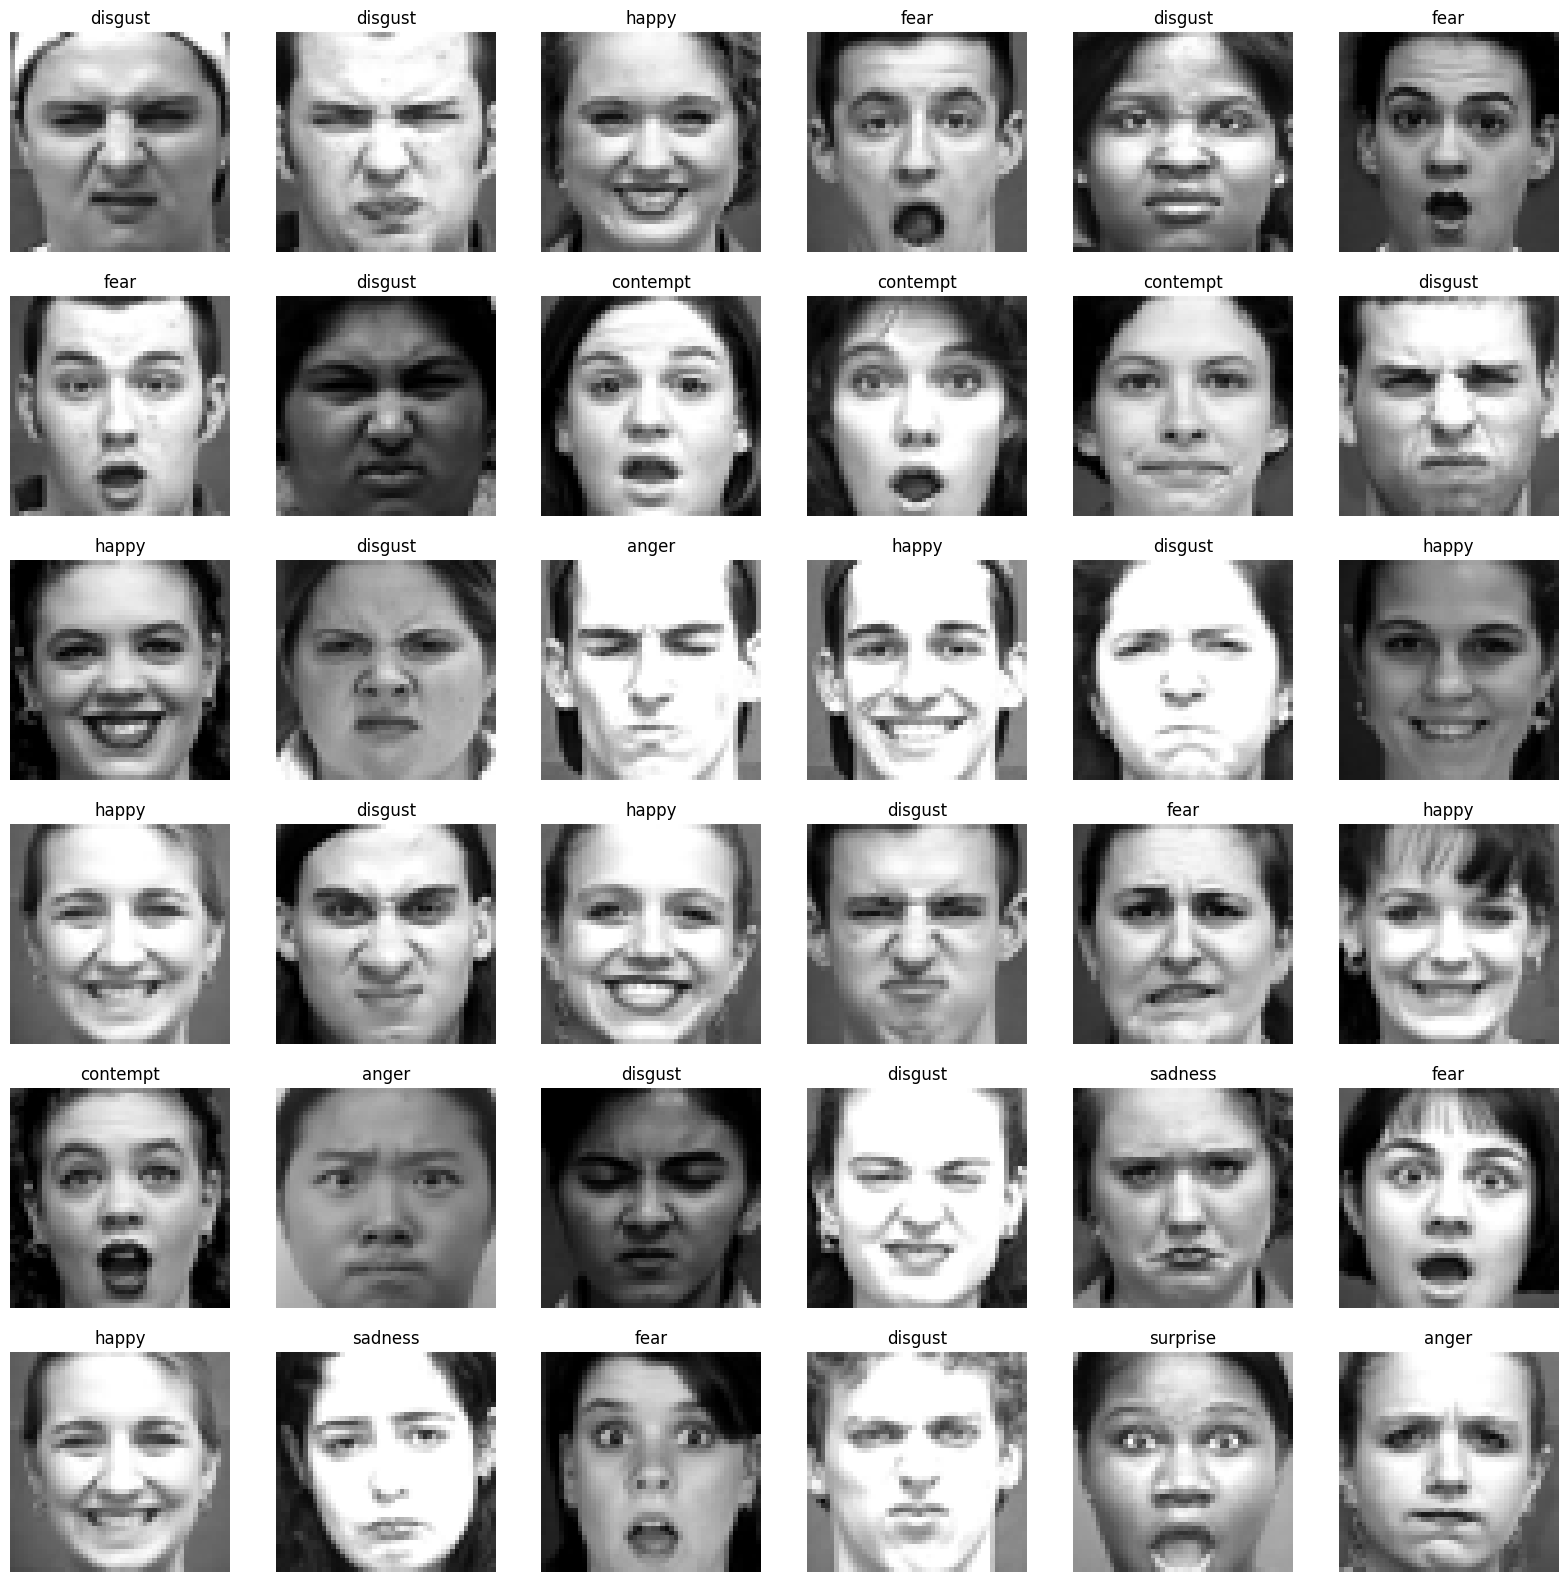

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize= (20,20))
for i,z in enumerate(list(np.random.randint(0,len(x_img),36))):
    plt.subplot(6,6,i+1)
    plt.imshow(x_img[z])
    plt.axis('off')
    plt.title(names[list(y_img[z].astype(int)).index(1)])